In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
cpi_data = pd.read_csv('CPI.csv')
fed_rate = pd.read_csv('FEDFUNDS.csv')
gdp = pd.read_csv('GDP.csv')
hpi = pd.read_csv('HPI.csv')
unemp = pd.read_csv('Unemployment.csv')
mort = pd.read_csv('MORTGAGE.csv')
popg = pd.read_csv('PopulationGrowth.csv')

In [3]:
lst = [cpi_data, fed_rate, gdp, hpi, unemp, mort, popg]

In [4]:
for i in range(len(lst)):
    df_name = [k for k, v in globals().items() if v is lst[i]][0]
    output_string = (
        f"{df_name} has shape as : {lst[i].shape}"
    )
    print(output_string)

cpi_data has shape as : (239, 2)
fed_rate has shape as : (240, 2)
gdp has shape as : (80, 2)
hpi has shape as : (238, 2)
unemp has shape as : (240, 2)
mort has shape as : (1044, 2)
popg has shape as : (19, 2)


In [5]:
for i in range(len(lst)):
    df_name = [k for k, v in globals().items() if v is lst[i]][0]
    print(df_name + ' has min/max observation_date as :     ' + str(lst[i].observation_date.min()) + ' / ' + str(lst[i].observation_date.max()))

cpi_data has min/max observation_date as :     2005-05-01 / 2025-03-01
fed_rate has min/max observation_date as :     2005-05-01 / 2025-04-01
gdp has min/max observation_date as :     2005-04-01 / 2025-01-01
hpi has min/max observation_date as :     2005-05-01 / 2025-02-01
unemp has min/max observation_date as :     2005-05-01 / 2025-04-01
mort has min/max observation_date as :     2005-05-05 / 2025-05-01
popg has min/max observation_date as :     2005-01-01 / 2023-01-01


In [6]:
cpi_data.head()

,observation_date,CPIAUCSL
0,2005-05-01,193.6
1,2005-06-01,193.7
2,2005-07-01,194.9
3,2005-08-01,196.1
4,2005-09-01,198.8


In [7]:
hpi.head()

,observation_date,CSUSHPISA
0,2005-05-01,169.352
1,2005-06-01,171.192
2,2005-07-01,172.861
3,2005-08-01,174.443
4,2005-09-01,176.439


In [8]:
df = pd.DataFrame({'observation_date': cpi_data['observation_date']})
df = pd.merge(df, cpi_data[['observation_date', 'CPIAUCSL']], on='observation_date', how='outer')
df = pd.merge(df, fed_rate[['observation_date', 'FEDFUNDS']], on='observation_date', how='outer')
df = pd.merge(df, hpi[['observation_date', 'CSUSHPISA']], on='observation_date', how='outer')
df = pd.merge(df, unemp[['observation_date', 'UNRATE']], on='observation_date', how='outer')

df = df.rename(columns={'observation_date': 'Date','CPIAUCSL': 'CPI', 'FEDFUNDS': 'FED', 'UNRATE': 'UNEMP', 'CSUSHPISA': "HPI"})

In [9]:
df.head()

,Date,CPI,FED,HPI,UNEMP
0,2005-05-01,193.6,3.00,169.352,5.1
1,2005-06-01,193.7,3.04,171.192,5.0
2,2005-07-01,194.9,3.26,172.861,5.0
3,2005-08-01,196.1,3.50,174.443,4.9
4,2005-09-01,198.8,3.62,176.439,5.0


In [10]:
df.shape

(240, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    240 non-null    object 
 1   CPI     239 non-null    float64
 2   FED     240 non-null    float64
 3   HPI     238 non-null    float64
 4   UNEMP   240 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.5+ KB


In [12]:
mort.head()

,observation_date,MORTGAGE30US
0,2005-05-05,5.75
1,2005-05-12,5.77
2,2005-05-19,5.71
3,2005-05-26,5.65
4,2005-06-02,5.62


In [13]:
mort['observation_date'] = pd.to_datetime(mort['observation_date'])
mort_montly = mort.resample('M', on='observation_date').mean()
mort_montly.head()

,MORTGAGE30US
observation_date,
2005-05-31,5.720
2005-06-30,5.582
2005-07-31,5.695
2005-08-31,5.820
2005-09-30,5.774


In [14]:
mort_montly = mort_montly.reset_index()
mort_montly['observation_date'] = pd.to_datetime(mort_montly['observation_date'])
mort_montly['year'] = mort_montly['observation_date'].dt.year
mort_montly['month'] = mort_montly['observation_date'].dt.month

mort_montly['observation_date'] = pd.to_datetime({'year': mort_montly['year'], 'month': mort_montly['month'], 'day': 1})

mort_montly = mort_montly.drop(['year', 'month'], axis=1)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df = pd.merge(df, mort_montly[['observation_date', 'MORTGAGE30US']], left_on = 'Date', right_on='observation_date', how='left')

df = df.drop(columns=['observation_date'], axis = 1)

In [16]:
gdp_data = []
gdp_col = list(gdp['GDP'])
for num in gdp_col:
  for i in range(3):
    gdp_data.append(num)

In [17]:
df['GDP'] = gdp_data

In [18]:
df.head()

,Date,CPI,FED,HPI,UNEMP,MORTGAGE30US,GDP
0,2005-05-01,193.6,3.00,169.352,5.1,5.720,12922.656
1,2005-06-01,193.7,3.04,171.192,5.0,5.582,12922.656
2,2005-07-01,194.9,3.26,172.861,5.0,5.695,12922.656
3,2005-08-01,196.1,3.50,174.443,4.9,5.820,13142.642
4,2005-09-01,198.8,3.62,176.439,5.0,5.774,13142.642


In [19]:
date_rng = pd.date_range(start=popg['observation_date'].min(), end=popg['observation_date'].max(), freq='YS')
monthly_popg = pd.DataFrame({'Date': date_rng})
all_monthly_dates = []
for year in date_rng.year:
    monthly_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='MS')
    all_monthly_dates.extend(monthly_dates)

monthly_popg = pd.DataFrame({'Date': all_monthly_dates})
monthly_popg = pd.merge(monthly_popg, popg, left_on=monthly_popg['Date'].dt.year, right_on=popg['observation_date'].str[:4].astype(int), how='left')
monthly_popg = monthly_popg.drop(columns=['key_0'])
monthly_popg['SPPOPGROWUSA'] = monthly_popg['SPPOPGROWUSA'].ffill()


In [20]:
monthly_popg.drop(columns=['observation_date'], inplace=True)

In [21]:
monthly_popg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          228 non-null    datetime64[ns]
 1   SPPOPGROWUSA  228 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [22]:
df = pd.merge(df, monthly_popg, on = 'Date', how = 'left')

In [23]:
df.rename(columns={'SPPOPGROWUSA': 'POPG', 'MORTGAGE30US': 'MORT'}, inplace=True)

In [24]:
df.head()

,Date,CPI,FED,HPI,UNEMP,MORT,GDP,POPG
0,2005-05-01,193.6,3.00,169.352,5.1,5.720,12922.656,0.921713
1,2005-06-01,193.7,3.04,171.192,5.0,5.582,12922.656,0.921713
2,2005-07-01,194.9,3.26,172.861,5.0,5.695,12922.656,0.921713
3,2005-08-01,196.1,3.50,174.443,4.9,5.820,13142.642,0.921713
4,2005-09-01,198.8,3.62,176.439,5.0,5.774,13142.642,0.921713


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    240 non-null    datetime64[ns]
 1   CPI     239 non-null    float64       
 2   FED     240 non-null    float64       
 3   HPI     238 non-null    float64       
 4   UNEMP   240 non-null    float64       
 5   MORT    240 non-null    float64       
 6   GDP     240 non-null    float64       
 7   POPG    224 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 15.1 KB


In [26]:
df.describe()

,Date,CPI,FED,HPI,UNEMP,MORT,GDP,POPG
count,240,239.000000,240.000000,238.000000,240.000000,240.000000,240.000000,224.000000
mean,2015-04-16 23:00:00,244.097628,1.715833,199.467134,5.799167,4.793254,19156.365800,0.703373
min,2005-05-01 00:00:00,193.600000,0.050000,136.526000,3.400000,2.684000,12922.656000,0.157343
25%,2010-04-23 12:00:00,217.764000,0.120000,158.554000,4.100000,3.801375,14959.894500,0.526435
50%,2015-04-16 00:00:00,237.460000,0.400000,181.714500,5.000000,4.456750,18171.656500,0.733362
75%,2020-04-08 12:00:00,258.214000,3.320000,216.321250,7.350000,6.117750,21719.792500,0.887917
max,2025-04-01 00:00:00,319.775000,5.330000,330.245000,14.800000,7.620000,29977.632000,0.969000
std,NaN,32.852788,1.970431,56.409105,2.149379,1.258254,4760.448782,0.219336


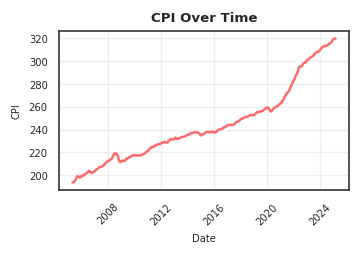

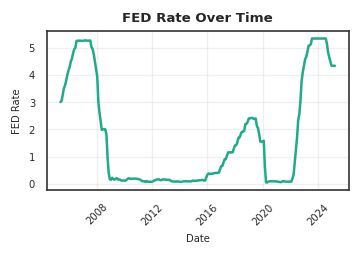

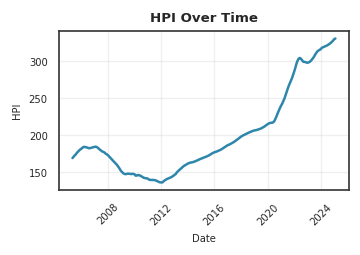

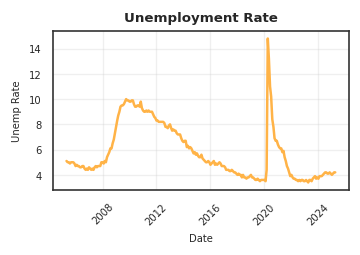

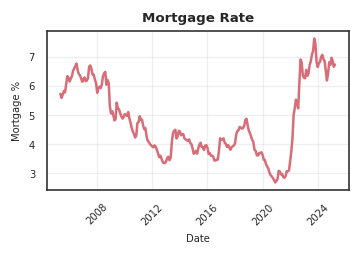

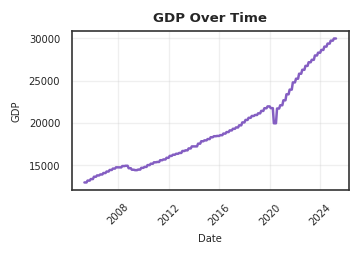

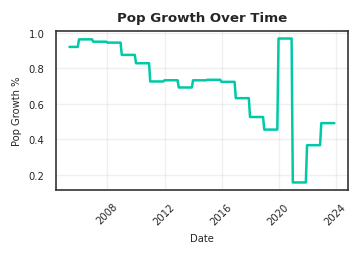

In [27]:
import matplotlib.dates as mdates

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 9,
    'axes.labelsize': 7,
    'axes.edgecolor': '#333333',
    'axes.linewidth': 1,
    'lines.linewidth': 1.5,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
})

def sexy_small_plot(x, y, title, ylabel, color, figsize=(3, 2)):
    plt.figure(figsize=figsize, dpi=120)
    plt.plot(x, y, color=color)
    plt.xlabel('Date', fontsize=6)
    plt.ylabel(ylabel, fontsize=6)
    plt.title(title, fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout(pad=1)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    plt.show()


colors = ['#FF6B6B', '#1FAB89', '#2E86AB', '#FFB347', '#D76D77', '#845EC2', '#00C9A7']

sexy_small_plot(df['Date'], df['CPI'], 'CPI Over Time', 'CPI', colors[0])
sexy_small_plot(df['Date'], df['FED'], 'FED Rate Over Time', 'FED Rate', colors[1])
sexy_small_plot(df['Date'], df['HPI'], 'HPI Over Time', 'HPI', colors[2])
sexy_small_plot(df['Date'], df['UNEMP'], 'Unemployment Rate', 'Unemp Rate', colors[3])
sexy_small_plot(df['Date'], df['MORT'], 'Mortgage Rate', 'Mortgage %', colors[4])
sexy_small_plot(df['Date'], df['GDP'], 'GDP Over Time', 'GDP', colors[5])
sexy_small_plot(df['Date'], df['POPG'], 'Pop Growth Over Time', 'Pop Growth %', colors[6])


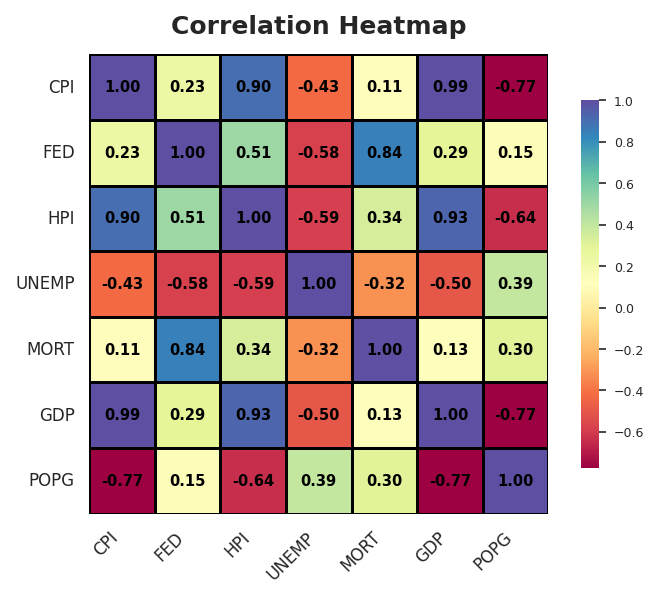

In [28]:
float_cols = df.select_dtypes(include=['float64']).columns
corr_matrix = df[float_cols].corr()

sns.set_style("whitegrid")
plt.figure(figsize=( 5,4), dpi=150)

cmap = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.5,
    linecolor='black',
    square=True,
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},
    annot_kws={"fontsize": 7, "fontweight": "bold", "color": "black"}
)

plt.title("Correlation Heatmap", fontsize=12, fontweight="bold", pad=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


In [29]:
import itertools

for col1, col2 in itertools.combinations(float_cols, 2):
    x = df[col1].corr(df[col2])
    if abs(x) > 0.65:
        print(f'{col1} has a correlation of {x} with {col2}')

CPI has a correlation of 0.9030617991457404 with HPI
CPI has a correlation of 0.9932557234500142 with GDP
CPI has a correlation of -0.7660887746627387 with POPG
FED has a correlation of 0.84320646584948 with MORT
HPI has a correlation of 0.928812200585684 with GDP
GDP has a correlation of -0.7721648510091365 with POPG


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    240 non-null    datetime64[ns]
 1   CPI     239 non-null    float64       
 2   FED     240 non-null    float64       
 3   HPI     238 non-null    float64       
 4   UNEMP   240 non-null    float64       
 5   MORT    240 non-null    float64       
 6   GDP     240 non-null    float64       
 7   POPG    224 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 15.1 KB


In [31]:
print(df[df['CPI'].isna()])

          Date  CPI   FED  HPI  UNEMP   MORT        GDP  POPG
239 2025-04-01  NaN  4.33  NaN    4.2  6.725  29977.632   NaN


In [32]:
print(df[df['HPI'].isna()])

          Date      CPI   FED  HPI  UNEMP   MORT        GDP  POPG
238 2025-03-01  319.615  4.33  NaN    4.2  6.650  29977.632   NaN
239 2025-04-01      NaN  4.33  NaN    4.2  6.725  29977.632   NaN


In [33]:
df['CPI'] = df['CPI'].fillna(method='ffill')
df['HPI'] = df['HPI'].fillna(method='ffill')


In [34]:
popg.tail()

,observation_date,SPPOPGROWUSA
14,2019-01-01,0.455381
15,2020-01-01,0.969000
16,2021-01-01,0.157343
17,2022-01-01,0.367473
18,2023-01-01,0.491925


In [35]:
x = list(popg['SPPOPGROWUSA'])

In [36]:
impute = sum(x[-4:])/4
df['POPG'] = df['POPG'].fillna(impute)

In [37]:
df.drop(['Date'], axis = 1, inplace = True)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['CPI', 'FED', 'UNEMP', 'MORT', 'GDP', 'POPG']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head())


        CPI       FED      HPI     UNEMP      MORT       GDP      POPG
0  0.000000  0.558712  169.352  0.149123  0.615073  0.000000  0.941741
1  0.000793  0.566288  171.192  0.140351  0.587115  0.000000  0.941741
2  0.010303  0.607955  172.861  0.140351  0.610008  0.000000  0.941741
3  0.019814  0.653409  174.443  0.131579  0.635332  0.012899  0.941741
4  0.041213  0.676136  176.439  0.140351  0.626013  0.012899  0.941741


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
X = df.drop('HPI', axis=1)
y = df['HPI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # You can tune alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 365.9402710748316


In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best hyperparameters: {mse}")

Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 1}
Mean Squared Error with best hyperparameters: 205.3875361896985


In [41]:
coefficients = best_model.coef_
intercept = best_model.intercept_

feature_names = X.columns

print("Coefficients:")
for feature_name, coef in zip(feature_names, coefficients):
  print(f"{feature_name}: {coef}")

print(f"\nIntercept: {intercept}")

Coefficients:
CPI: -259.9557835910081
FED: 12.798339296757298
UNEMP: 14.138373617904193
MORT: 41.435137410942
GDP: 422.1760548007252
POPG: -12.921898747762498

Intercept: 134.7975431297353
